## Data Cleaning

In [1]:
import warnings
import os
import pandas as pd
import numpy as np
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
os.chdir(os.getcwd())
pd.options.display.max_rows = 10

In [2]:
print(os.getcwd())

C:\Users\ankit19.gupta\ankit\ankit\gate_marks_distribution


In [3]:
xslx=pd.ExcelFile('.\\Mark Distribution in GATE CSE.xlsx')
df=pd.read_excel(xslx,sheet_name='Alt. View')

In [4]:
df.dropna(how='all',axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df=pd.DataFrame(df.values[:-3],columns=df.columns)
df.fillna(0,inplace=True)

In [5]:
df[list(df.columns)[1]] = df[list(df.columns)[1]].astype(str)
df[list(df.columns)[1]][14] = '1,12'
df[list(df.columns)[1]][20] = '7,8,10'
df[list(df.columns)[1]][23] = '7,15'
df[list(df.columns)[1]][26] = '6,7'
df[list(df.columns)[2]] = df[list(df.columns)[2]].astype(str)
df[list(df.columns)[2]][11] = '1,6'
df[list(df.columns)[2]][17] = '1,8'
df[list(df.columns)[3]] = df[list(df.columns)[3]].astype(str)
df[list(df.columns)[3]][26] = '22,4'
df[list(df.columns)[4]] = df[list(df.columns)[4]].astype(str)
df[list(df.columns)[4]][2] = '11,12'
df[list(df.columns)[5]] = df[list(df.columns)[5]].astype(str)
df[list(df.columns)[5]][23] = '11,14'
df[list(df.columns)[5]][26] = '11,12'
df[list(df.columns)[6]] = df[list(df.columns)[6]].astype(str)
df[list(df.columns)[6]][23] = '3,19'
df[list(df.columns)[8]] = df[list(df.columns)[8]].astype(str)
df[list(df.columns)[8]][23] = '1,2'
df[list(df.columns)[8]][26] = '5,23'
df[list(df.columns)[9]] = df[list(df.columns)[9]].astype(str)
df[list(df.columns)[9]][26] = '2,21'
df[list(df.columns)[10]] = df[list(df.columns)[10]].astype(str)
df[list(df.columns)[10]][20] = '5,6,16'
df[list(df.columns)[10]][26] = '3,20'

In [6]:
arr=np.array(df['Year'])
for i in range(len(arr)):
    if arr[i]=='2 Marks':
        x=arr[i-1][:]
        arr[i]=x+':'+arr[i]
    elif arr[i]=='1 Mark':
        x=arr[i-2][:]
        arr[i]=x+':'+arr[i] 
df['Year']=pd.Series(arr)

In [7]:
arr=np.array(df['Year'])
pattern=' - '
reg=re.compile(pattern,flags=re.IGNORECASE)
for i in range(len(arr)):
    arr[i]=reg.sub('-',arr[i])
df['Year']=pd.Series(arr)

In [8]:
df1=df[::3]
df2=df[1::3]
df3=df[2::3]

In [9]:
set_one_total_marks=df1[np.array(df1['Year'].str.match(r'[0-9][0-9][0-9][0-9]-1',flags=re.IGNORECASE))]
set_two_total_marks=df1[np.array(df1['Year'].str.match(r'[0-9][0-9][0-9][0-9]-2',flags=re.IGNORECASE))]
set_three_total_marks=df1[np.array(df1['Year'].str.match(r'[0-9][0-9][0-9][0-9]-3',flags=re.IGNORECASE))]
temp=df1[~df1.index.isin(set_one_total_marks.index)]
temp=temp[~temp.index.isin(set_three_total_marks.index)]
one_set_total_marks=temp[~temp.index.isin(set_two_total_marks.index)]
set_one_total_marks['Year']=set_one_total_marks['Year'].str.replace('[-][1]','')
set_two_total_marks['Year']=set_two_total_marks['Year'].str.replace('[-][2]','')
set_three_total_marks['Year']=set_three_total_marks['Year'].str.replace('[-][3]','')

In [10]:
set_one_two_marks=df2[np.array(df2['Year'].str.match(r'[0-9][0-9][0-9][0-9]-1',flags=re.IGNORECASE))]
set_two_two_marks=df2[np.array(df2['Year'].str.match(r'[0-9][0-9][0-9][0-9]-2',flags=re.IGNORECASE))]
set_three_two_marks=df2[np.array(df2['Year'].str.match(r'[0-9][0-9][0-9][0-9]-3',flags=re.IGNORECASE))]
temp=df2[~df2.index.isin(set_one_two_marks.index)]
temp=temp[~temp.index.isin(set_three_two_marks.index)]
one_set_two_marks=temp[~temp.index.isin(set_two_two_marks.index)]
set_one_two_marks['Year']=set_one_two_marks['Year'].str.replace('[-][1]:2 Marks','')
set_two_two_marks['Year']=set_two_two_marks['Year'].str.replace('[-][2]:2 Marks','')
set_three_two_marks['Year']=set_three_two_marks['Year'].str.replace('[-][3]:2 Marks','')
one_set_two_marks['Year']=one_set_two_marks['Year'].str.replace(':2 Marks','')

In [11]:
set_one_one_mark=df3[np.array(df3['Year'].str.match(r'[0-9][0-9][0-9][0-9]-1',flags=re.IGNORECASE))]
set_two_one_mark=df3[np.array(df3['Year'].str.match(r'[0-9][0-9][0-9][0-9]-2',flags=re.IGNORECASE))]
set_three_one_mark=df3[np.array(df3['Year'].str.match(r'[0-9][0-9][0-9][0-9]-3',flags=re.IGNORECASE))]
temp=df3[~df3.index.isin(set_one_one_mark.index)]
temp=temp[~temp.index.isin(set_three_one_mark.index)]
one_set_one_mark=temp[~temp.index.isin(set_two_one_mark.index)]
set_one_one_mark['Year']=set_one_one_mark['Year'].str.replace('[-][1]:1 Mark','')
set_two_one_mark['Year']=set_two_one_mark['Year'].str.replace('[-][2]:1 Mark','')
set_three_one_mark['Year']=set_three_one_mark['Year'].str.replace('[-][3]:1 Mark','')
one_set_one_mark['Year']=one_set_one_mark['Year'].str.replace(':1 Mark','')

In [12]:
set_one_total_marks.to_csv("datasets\\set_one_total_marks.csv",index=False,header=True,encoding='utf-8')
set_two_total_marks.to_csv("datasets\\set_two_total_marks.csv",index=False,header=True,encoding='utf-8')
set_three_total_marks.to_csv("datasets\\set_three_total_marks.csv",index=False,header=True,encoding='utf-8')
one_set_total_marks.to_csv("datasets\\one_set_total_marks.csv",index=False,header=True,encoding='utf-8')

In [13]:
def find_count(x):
    if isinstance(x,str): 
        return len(x.split(','))
    else:
        if x==0:
            return 0
        else:
            return 1

In [14]:
set_one_two_marks_count=set_one_two_marks.copy()
for i in range(1,len(set_one_two_marks_count.columns)-1):
    set_one_two_marks_count[set_one_two_marks_count.columns[i]]=set_one_two_marks_count[set_one_two_marks_count.columns[i]].map(find_count)
set_one_two_marks_count.drop('Total',axis=1,inplace=True)
set_two_two_marks_count=set_two_two_marks.copy()
for i in range(1,len(set_two_two_marks_count.columns)-1):
    set_two_two_marks_count[set_two_two_marks_count.columns[i]]=set_two_two_marks_count[set_two_two_marks_count.columns[i]].map(find_count)
set_two_two_marks_count.drop('Total',axis=1,inplace=True)    
set_three_two_marks_count=set_three_two_marks.copy()
for i in range(1,len(set_three_two_marks_count.columns)-1):
    set_three_two_marks_count[set_three_two_marks_count.columns[i]]=set_three_two_marks_count[set_three_two_marks_count.columns[i]].map(find_count)
set_three_two_marks_count.drop('Total',axis=1,inplace=True)    
one_set_two_marks_count=one_set_two_marks.copy()
for i in range(1,len(one_set_two_marks_count.columns)-1):
    one_set_two_marks_count[one_set_two_marks_count.columns[i]]=one_set_two_marks_count[one_set_two_marks_count.columns[i]].map(find_count)
one_set_two_marks_count.drop('Total',axis=1,inplace=True)    

In [15]:
set_one_one_mark_count=set_one_one_mark.copy()
for i in range(1,len(set_one_one_mark_count.columns)-1):
    set_one_one_mark_count[set_one_one_mark_count.columns[i]]=set_one_one_mark_count[set_one_one_mark_count.columns[i]].map(find_count)
set_one_one_mark_count.drop('Total',axis=1,inplace=True)
set_two_one_mark_count=set_two_one_mark.copy()
for i in range(1,len(set_two_one_mark_count.columns)-1):
    set_two_one_mark_count[set_two_one_mark_count.columns[i]]=set_two_one_mark_count[set_two_one_mark_count.columns[i]].map(find_count)
set_two_one_mark_count.drop('Total',axis=1,inplace=True)    
set_three_one_mark_count=set_three_one_mark.copy()
for i in range(1,len(set_three_one_mark_count.columns)-1):
    set_three_one_mark_count[set_three_one_mark_count.columns[i]]=set_three_one_mark_count[set_three_one_mark_count.columns[i]].map(find_count)
set_three_one_mark_count.drop('Total',axis=1,inplace=True)    
one_set_one_mark_count=one_set_one_mark.copy()
for i in range(1,len(one_set_one_mark_count.columns)-1):
    one_set_one_mark_count[one_set_one_mark_count.columns[i]]=one_set_one_mark_count[one_set_one_mark_count.columns[i]].map(find_count)
one_set_one_mark_count.drop('Total',axis=1,inplace=True)    

In [16]:
set_one_total_two_marks=pd.DataFrame(np.hstack((set_one_two_marks_count.values[:,0].reshape(len(set_one_two_marks_count.values),1),set_one_two_marks_count.values[:,1:]*2)),columns=set_one_two_marks_count.columns,index=set_one_two_marks_count.index)
set_one_total_two_marks.to_csv("datasets\\set_one_total_two_marks.csv",index=False)
set_one_two_marks_count.to_csv("datasets\\set_one_two_marks_count.csv",index=False,header=True,encoding='utf-8')

set_two_total_two_marks=pd.DataFrame(np.hstack((set_two_two_marks_count.values[:,0].reshape(len(set_two_two_marks_count.values),1),set_two_two_marks_count.values[:,1:]*2)),columns=set_two_two_marks_count.columns,index=set_two_two_marks_count.index)
set_two_total_two_marks.to_csv("datasets\\set_two_total_two_marks.csv",index=False)
set_two_two_marks_count.to_csv("datasets\\set_two_two_marks_count.csv",index=False,header=True,encoding='utf-8')

set_three_total_two_marks=pd.DataFrame(np.hstack((set_three_two_marks_count.values[:,0].reshape(len(set_three_two_marks_count.values),1),set_three_two_marks_count.values[:,1:]*2)),columns=set_three_two_marks_count.columns,index=set_three_two_marks_count.index)
set_three_total_two_marks.to_csv("datasets\\set_three_total_two_marks.csv",index=False)
set_three_two_marks_count.to_csv("datasets\\set_three_two_marks_count.csv",index=False,header=True,encoding='utf-8')
    
one_set_total_two_marks=pd.DataFrame(np.hstack((one_set_two_marks_count.values[:,0].reshape(len(one_set_two_marks_count.values),1),one_set_two_marks_count.values[:,1:]*2)),columns=one_set_two_marks_count.columns,index=one_set_two_marks_count.index)
one_set_total_two_marks.to_csv("datasets\\one_set_total_two_marks.csv",index=False)
one_set_two_marks_count.to_csv("datasets\\one_set_two_marks_count.csv",index=False,header=True,encoding='utf-8')


In [17]:
set_one_total_one_mark=set_one_one_mark_count*1
set_one_total_one_mark.to_csv("datasets\\set_one_total_one_mark.csv",index=False)
set_one_one_mark_count.to_csv("datasets\\set_one_one_mark_count.csv",index=False,header=True,encoding='utf-8')

set_two_total_one_mark=set_two_one_mark_count*1
set_two_total_one_mark.to_csv("datasets\\set_two_total_one_mark.csv",index=False)
set_two_one_mark_count.to_csv("datasets\\set_two_one_mark_count.csv",index=False,header=True,encoding='utf-8')

set_three_total_one_mark=set_three_one_mark_count*1
set_three_total_one_mark.to_csv("datasets\\set_three_total_one_mark.csv",index=False)
set_three_one_mark_count.to_csv("datasets\\set_three_one_mark_count.csv",index=False,header=True,encoding='utf-8')
    
one_set_total_one_mark=one_set_one_mark_count*1
one_set_total_one_mark.to_csv("datasets\\one_set_total_one_mark.csv",index=False)
one_set_one_mark_count.to_csv("datasets\\one_set_one_mark_count.csv",index=False,header=True,encoding='utf-8')

In [18]:
# total marks
df1=set_one_total_marks
df2=set_two_total_marks
df3=set_three_total_marks
df4=one_set_total_marks
all_years_total_marks=pd.concat([df1,df2,df3,df4], ignore_index=True)
all_years_total_marks = all_years_total_marks.astype(int)
all_years_total_marks=all_years_total_marks.groupby(['Year'], sort=True)[['Theory of Computation','Algorithms','Digital Logic','Operating System',
 'Databases',
 'Compiler Design',
 'IS & Software Engg.',
 'CO & Architecture',
 'Programming',
 'Data Structures',
 'Computer Networks',
 'Web Technologies',
 'Discrete Mathematics',
 'Mathematical Logic',
 'Set Theory & Algebra',
 'Combinatory',
 'Graph Theory',
 'Engineering Mathematics',
 'Probability',
 'Linear Algebra',
 'Numerical Methods',
 'Calculus',
 'Quantitative Aptitude',
 'Verbal Aptitude',
 'Analytical Aptitude',
 'Spatial Aptitude',
 'Total']].sum()
all_years_total_marks = all_years_total_marks.reset_index()

In [19]:
# total 2 marks
df1=set_one_total_two_marks
df2=set_two_total_two_marks
df3=set_three_total_two_marks
df4=one_set_total_two_marks
all_years_total_two_marks=pd.concat([df1,df2,df3,df4], ignore_index=True)
all_years_total_two_marks = all_years_total_two_marks.astype(int)
all_years_total_two_marks=all_years_total_two_marks.groupby(['Year'], sort=True)[['Theory of Computation','Algorithms','Digital Logic','Operating System',
 'Databases',
 'Compiler Design',
 'IS & Software Engg.',
 'CO & Architecture',
 'Programming',
 'Data Structures',
 'Computer Networks',
 'Web Technologies',
 'Discrete Mathematics',
 'Mathematical Logic',
 'Set Theory & Algebra',
 'Combinatory',
 'Graph Theory',
 'Engineering Mathematics',
 'Probability',
 'Linear Algebra',
 'Numerical Methods',
 'Calculus',
 'Quantitative Aptitude',
 'Verbal Aptitude',
 'Analytical Aptitude',
 'Spatial Aptitude']].sum()
all_years_total_two_marks = all_years_total_two_marks.reset_index()

In [20]:
# total one mark
df1=set_one_total_one_mark
df2=set_two_total_one_mark
df3=set_three_total_one_mark
df4=one_set_total_one_mark
all_years_total_one_mark=pd.concat([df1,df2,df3,df4], ignore_index=True)
all_years_total_one_mark = all_years_total_one_mark.astype(int)
all_years_total_one_mark=all_years_total_one_mark.groupby(['Year'], sort=True)[['Theory of Computation','Algorithms','Digital Logic','Operating System',
 'Databases',
 'Compiler Design',
 'IS & Software Engg.',
 'CO & Architecture',
 'Programming',
 'Data Structures',
 'Computer Networks',
 'Web Technologies',
 'Discrete Mathematics',
 'Mathematical Logic',
 'Set Theory & Algebra',
 'Combinatory',
 'Graph Theory',
 'Engineering Mathematics',
 'Probability',
 'Linear Algebra',
 'Numerical Methods',
 'Calculus',
 'Quantitative Aptitude',
 'Verbal Aptitude',
 'Analytical Aptitude',
 'Spatial Aptitude']].sum()
all_years_total_one_mark = all_years_total_one_mark.reset_index()

In [21]:
all_years_total_marks.to_csv("datasets\\all_years_total_marks.csv",index=False,encoding='utf-8',header=True)
all_years_total_two_marks.to_csv("datasets\\all_years_total_two_marks.csv",index=False,encoding='utf-8',header=True)
all_years_total_one_mark.to_csv("datasets\\all_years_total_one_mark.csv",index=False,encoding='utf-8',header=True)

# Line Plots

In [22]:
x=np.array(all_years_total_marks.Year)
x

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024], dtype=int64)

## Total Marks vs Years

In [23]:
df1=all_years_total_marks

In [24]:
df1.columns

Index(['Year', 'Theory of Computation', 'Algorithms', 'Digital Logic',
       'Operating System', 'Databases', 'Compiler Design',
       'IS & Software Engg.', 'CO & Architecture', 'Programming',
       'Data Structures', 'Computer Networks', 'Web Technologies',
       'Discrete Mathematics', 'Mathematical Logic', 'Set Theory & Algebra',
       'Combinatory', 'Graph Theory', 'Engineering Mathematics', 'Probability',
       'Linear Algebra', 'Numerical Methods', 'Calculus',
       'Quantitative Aptitude', 'Verbal Aptitude', 'Analytical Aptitude',
       'Spatial Aptitude', 'Total'],
      dtype='object')

In [25]:
Theory_of_Computation=np.array(df1['Theory of Computation'])
Algorithms=np.array(df1['Algorithms'])
Digital_Logic=np.array(df1['Digital Logic'])
Operating_System=np.array(df1['Operating System'])
Databases=np.array(df1['Databases'])
Compiler_Design=np.array(df1['Compiler Design'])
CO_and_Architecture=np.array(df1['CO & Architecture'])
Programming=np.array(df1['Programming'])
Data_Structures=np.array(df1['Data Structures'])
Computer_Networks=np.array(df1['Computer Networks'])
Mathematical_Logic=np.array(df1['Mathematical Logic'])
Set_Theory_and_Algebra=np.array(df1['Set Theory & Algebra'])
Combinatory=np.array(df1['Combinatory'])
Graph_Theory=np.array(df1['Graph Theory'])
Probability=np.array(df1['Probability'])
Linear_Algebra=np.array(df1['Linear Algebra'])
Calculus=np.array(df1['Calculus'])
Quantitative_Aptitude=np.array(df1['Quantitative Aptitude'])
Verbal_Aptitude=np.array(df1['Verbal Aptitude'])
Analytical_Aptitude=np.array(df1['Analytical Aptitude'])
Spatial_Aptitude=np.array(df1['Spatial Aptitude'])
Discrete_Mathematics=np.array(df1['Discrete Mathematics'])
Engineering_Mathematics=np.array(df1['Engineering Mathematics'])

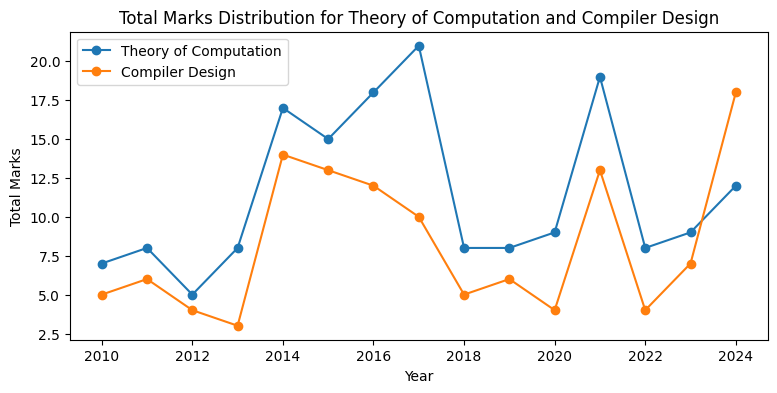

In [26]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Theory_of_Computation,marker='o', label='Theory of Computation')
ax.plot(x,Compiler_Design,marker='o', label='Compiler Design')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Theory of Computation and Compiler Design')
plt.savefig('Total_Marks\\total_marks1.png',dpi=400,bbox_inches='tight')

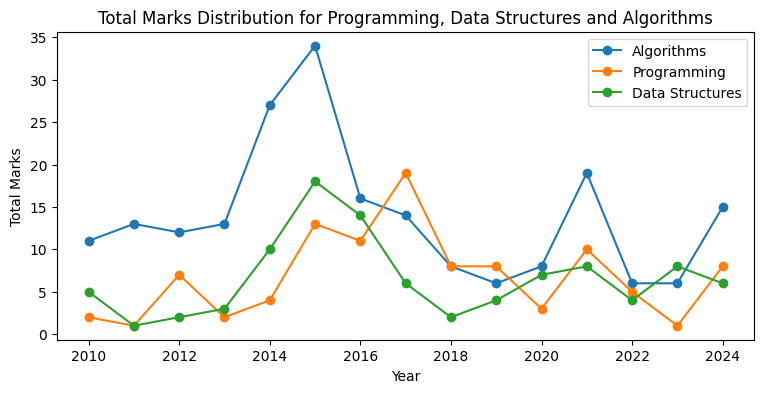

In [27]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Algorithms,marker='o', label='Algorithms')
ax.plot(x,Programming,marker='o', label='Programming')
ax.plot(x,Data_Structures,marker='o', label='Data Structures')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Programming, Data Structures and Algorithms')
plt.savefig('Total_Marks\\total_marks2.png',dpi=400,bbox_inches='tight')

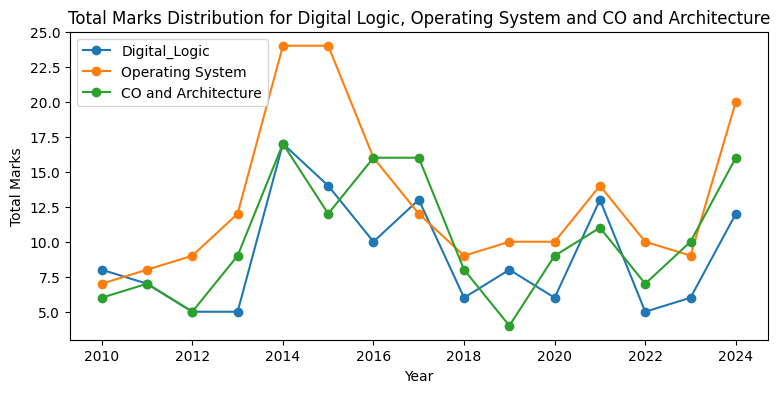

In [28]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Digital_Logic,marker='o', label='Digital_Logic')
ax.plot(x,Operating_System,marker='o', label='Operating System')
ax.plot(x,CO_and_Architecture,marker='o', label='CO and Architecture')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Digital Logic, Operating System and CO and Architecture')
plt.savefig('Total_Marks\\total_marks3.png',dpi=400,bbox_inches='tight')

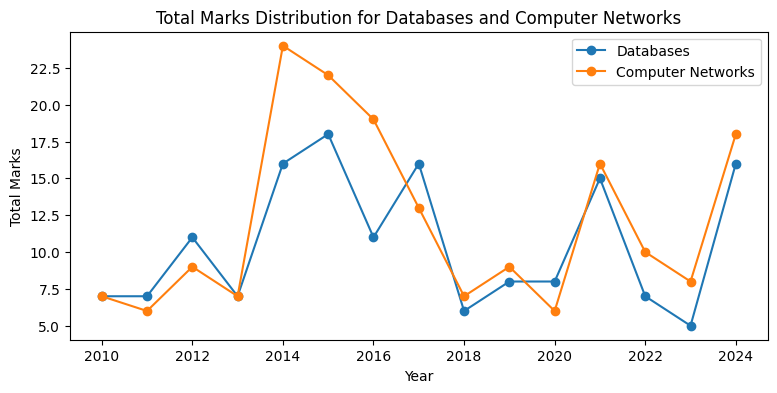

In [29]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Databases,marker='o', label='Databases')
ax.plot(x,Computer_Networks,marker='o', label='Computer Networks')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Databases and Computer Networks')
plt.savefig('Total_Marks\\total_marks4.png',dpi=400,bbox_inches='tight')

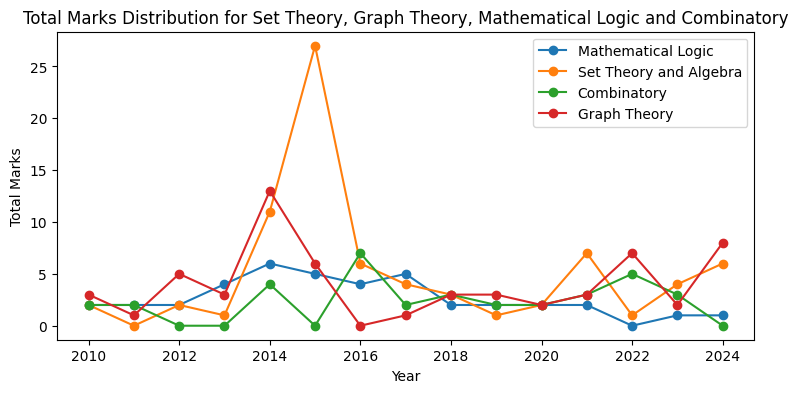

In [30]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Mathematical_Logic,marker='o', label='Mathematical Logic')
ax.plot(x,Set_Theory_and_Algebra,marker='o', label='Set Theory and Algebra')
ax.plot(x,Combinatory,marker='o', label='Combinatory')
ax.plot(x,Graph_Theory,marker='o', label='Graph Theory')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Set Theory, Graph Theory, Mathematical Logic and Combinatory')
plt.savefig('Total_Marks\\total_marks5.png',dpi=400,bbox_inches='tight')

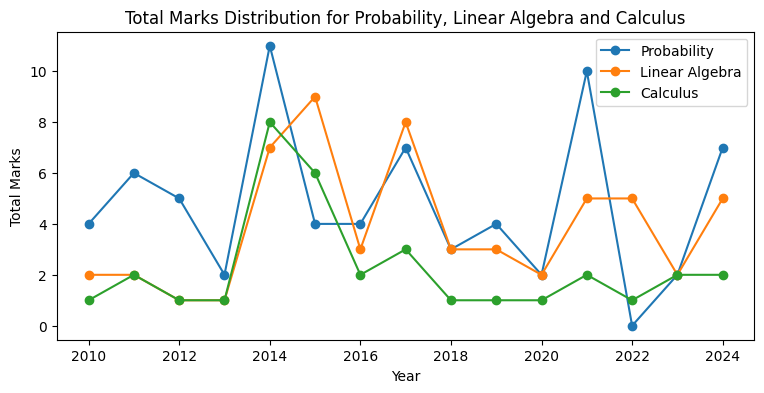

In [31]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Probability,marker='o', label='Probability')
ax.plot(x,Linear_Algebra,marker='o', label='Linear Algebra')
ax.plot(x,Calculus,marker='o', label='Calculus')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Probability, Linear Algebra and Calculus')
plt.savefig('Total_Marks\\total_marks6.png',dpi=400,bbox_inches='tight')

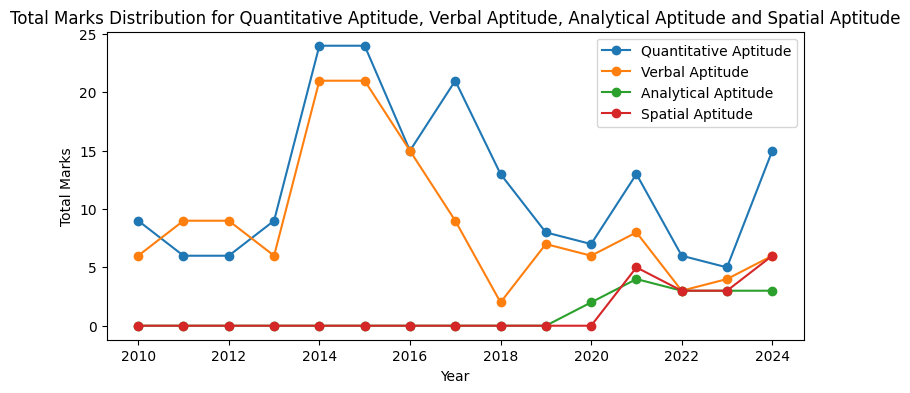

In [32]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Quantitative_Aptitude,marker='o', label='Quantitative Aptitude')
ax.plot(x,Verbal_Aptitude,marker='o', label='Verbal Aptitude')
ax.plot(x,Analytical_Aptitude,marker='o', label='Analytical Aptitude')
ax.plot(x,Spatial_Aptitude,marker='o', label='Spatial Aptitude')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Quantitative Aptitude, Verbal Aptitude, Analytical Aptitude and Spatial Aptitude')
plt.savefig('Total_Marks\\total_marks7.png',dpi=400,bbox_inches='tight')

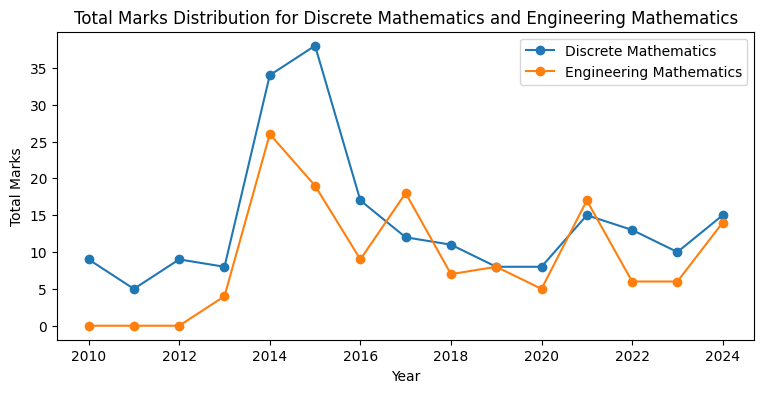

In [33]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Discrete_Mathematics,marker='o', label='Discrete Mathematics')
ax.plot(x,Engineering_Mathematics,marker='o', label='Engineering Mathematics')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks Distribution for Discrete Mathematics and Engineering Mathematics')
plt.savefig('Total_Marks\\total_marks8.png',dpi=400,bbox_inches='tight')

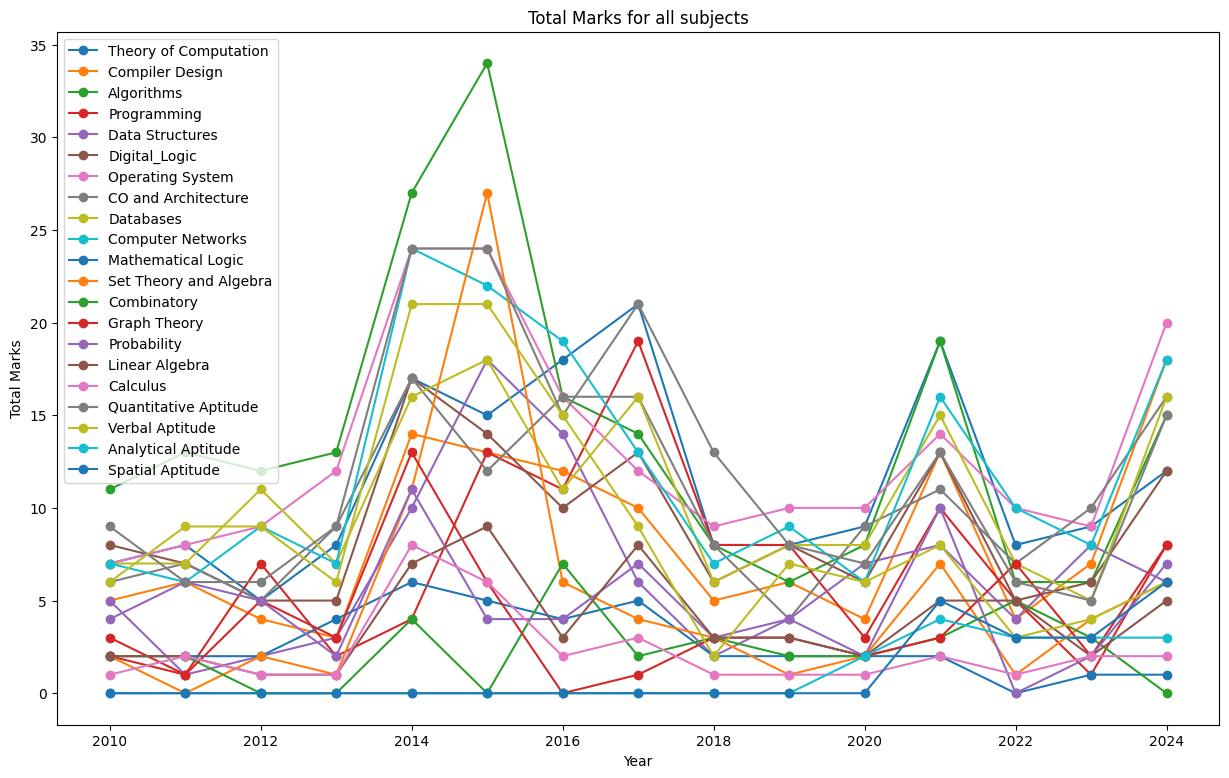

In [34]:
fig=plt.figure(figsize=(15,9))
ax=fig.add_subplot(1,1,1)
ax.plot(x,Theory_of_Computation,marker='o', label='Theory of Computation')
ax.plot(x,Compiler_Design,marker='o', label='Compiler Design')
ax.plot(x,Algorithms,marker='o', label='Algorithms')
ax.plot(x,Programming,marker='o', label='Programming')
ax.plot(x,Data_Structures,marker='o', label='Data Structures')
ax.plot(x,Digital_Logic,marker='o', label='Digital_Logic')
ax.plot(x,Operating_System,marker='o', label='Operating System')
ax.plot(x,CO_and_Architecture,marker='o', label='CO and Architecture')
ax.plot(x,Databases,marker='o', label='Databases')
ax.plot(x,Computer_Networks,marker='o', label='Computer Networks')
ax.plot(x,Mathematical_Logic,marker='o', label='Mathematical Logic')
ax.plot(x,Set_Theory_and_Algebra,marker='o', label='Set Theory and Algebra')
ax.plot(x,Combinatory,marker='o', label='Combinatory')
ax.plot(x,Graph_Theory,marker='o', label='Graph Theory')
ax.plot(x,Probability,marker='o', label='Probability')
ax.plot(x,Linear_Algebra,marker='o', label='Linear Algebra')
ax.plot(x,Calculus,marker='o', label='Calculus')
ax.plot(x,Quantitative_Aptitude,marker='o', label='Quantitative Aptitude')
ax.plot(x,Verbal_Aptitude,marker='o', label='Verbal Aptitude')
ax.plot(x,Analytical_Aptitude,marker='o', label='Analytical Aptitude')
ax.plot(x,Spatial_Aptitude,marker='o', label='Spatial Aptitude')
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Total Marks')
ax.set_title('Total Marks for all subjects')
plt.savefig('Total_Marks\\total_marks9.png',dpi=400,bbox_inches='tight')

## Histogram Plots

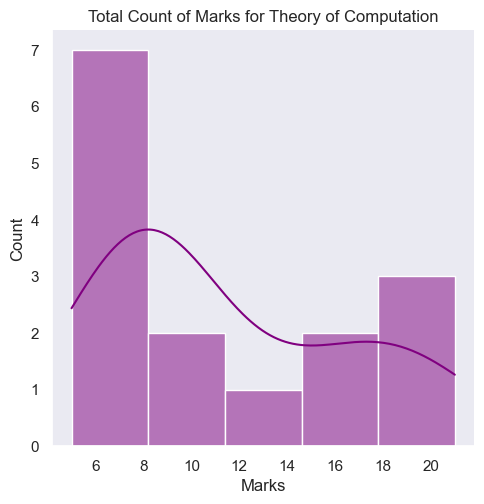

In [35]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Theory of Computation',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Theory of Computation')
plt.show()
fig.figure.savefig("Total_Marks\\total_marks10.png",dpi=400,bbox_inches='tight')

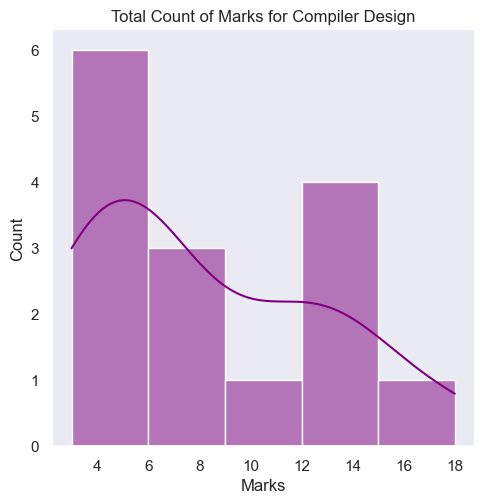

In [36]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Compiler Design',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Compiler Design')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks11.png',dpi=400,bbox_inches='tight')

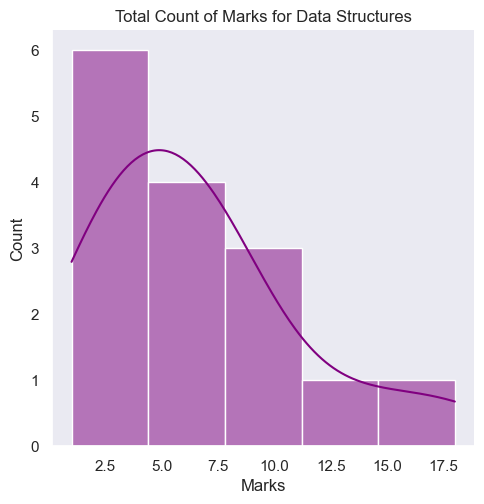

In [37]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Data Structures',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Data Structures')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks12.png',dpi=400,bbox_inches='tight')

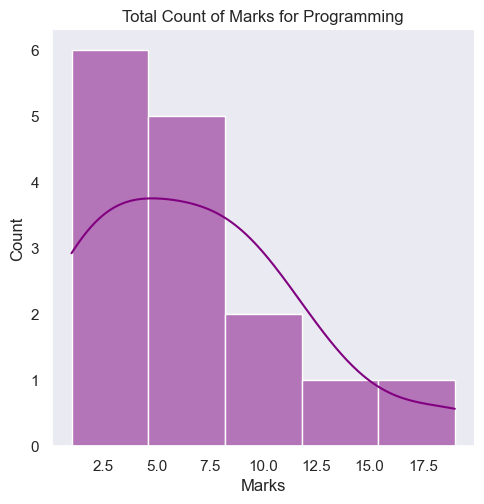

In [38]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Programming',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Programming')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks13.png',dpi=400,bbox_inches='tight')

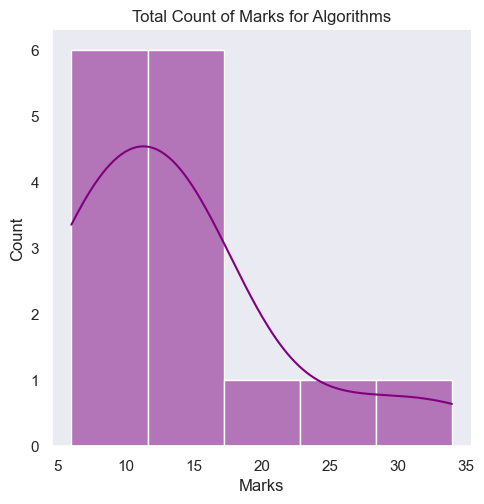

In [39]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Algorithms',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Algorithms')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks14.png',dpi=400,bbox_inches='tight')

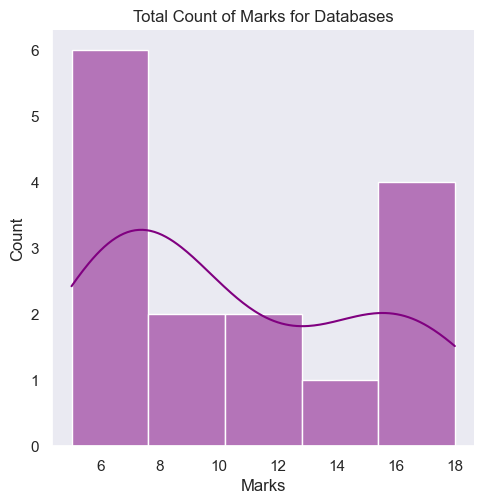

In [40]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Databases',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Databases')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks15.png',dpi=400,bbox_inches='tight')

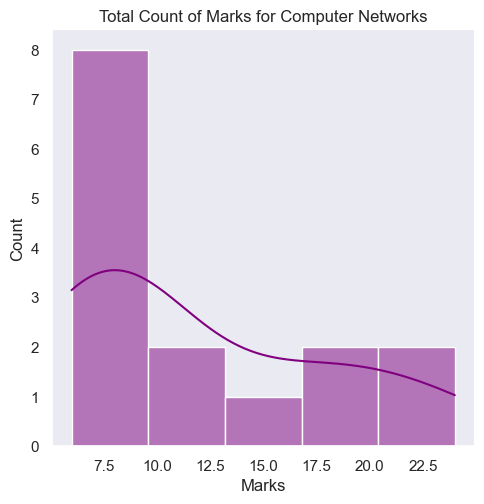

In [41]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Computer Networks',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Computer Networks')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks16.png',dpi=400,bbox_inches='tight')

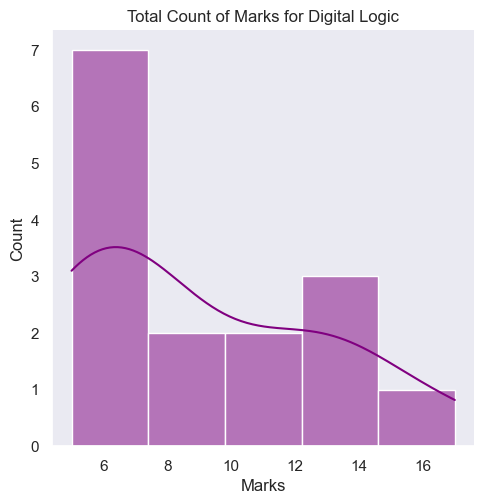

In [42]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Digital Logic',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Digital Logic')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks17.png',dpi=400,bbox_inches='tight')

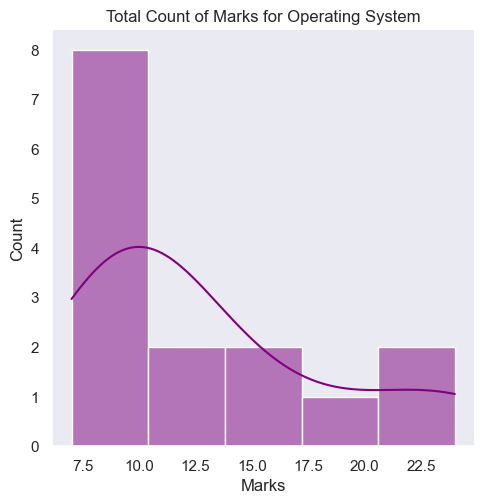

In [43]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Operating System',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Operating System')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks18.png',dpi=400,bbox_inches='tight')

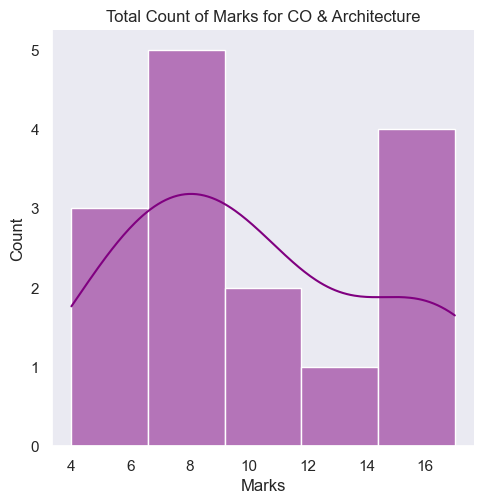

In [44]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'CO & Architecture',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for CO & Architecture')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks19.png',dpi=400,bbox_inches='tight')

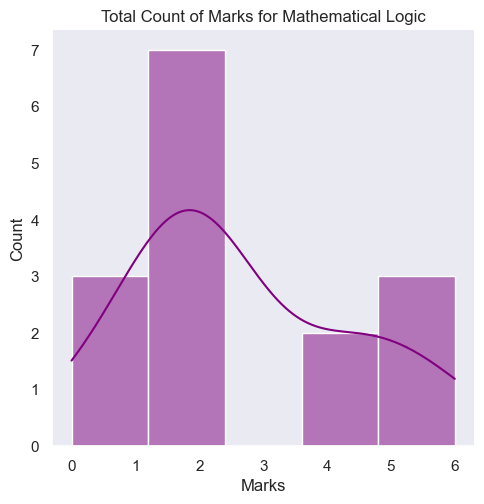

In [45]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Mathematical Logic',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Mathematical Logic')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks20.png',dpi=400,bbox_inches='tight')

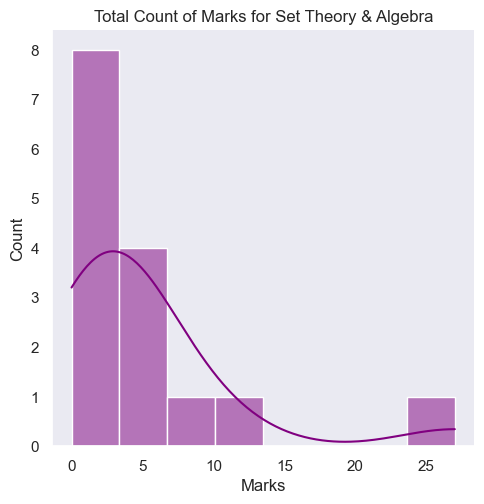

In [46]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Set Theory & Algebra',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Set Theory & Algebra')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks21.png',dpi=400,bbox_inches='tight')

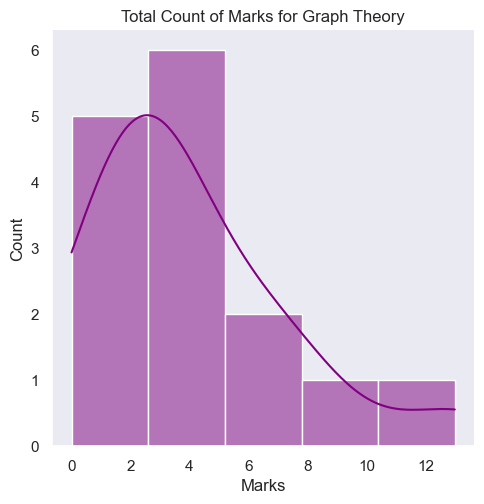

In [47]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Graph Theory',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Graph Theory')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks22.png',dpi=400,bbox_inches='tight')

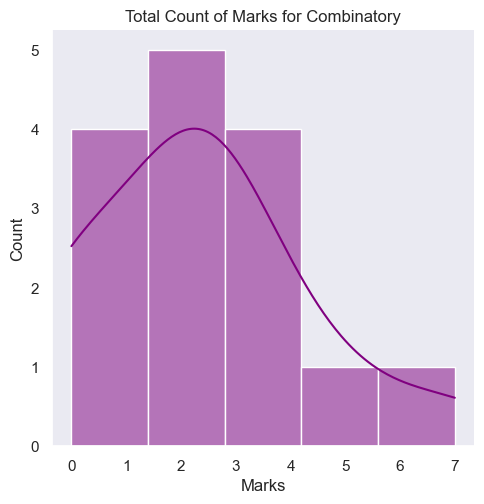

In [48]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Combinatory',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Combinatory')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks23.png',dpi=400,bbox_inches='tight')

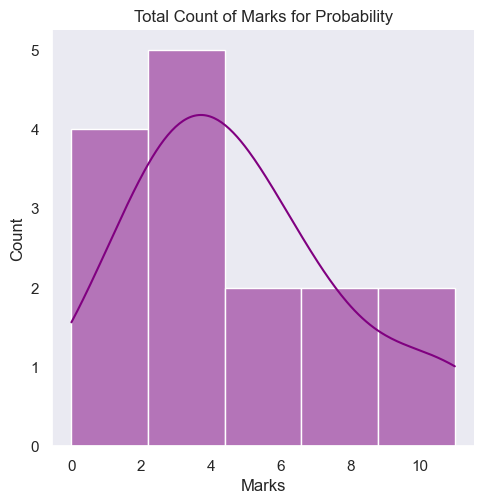

In [49]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Probability',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Probability')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks24.png',dpi=400,bbox_inches='tight')

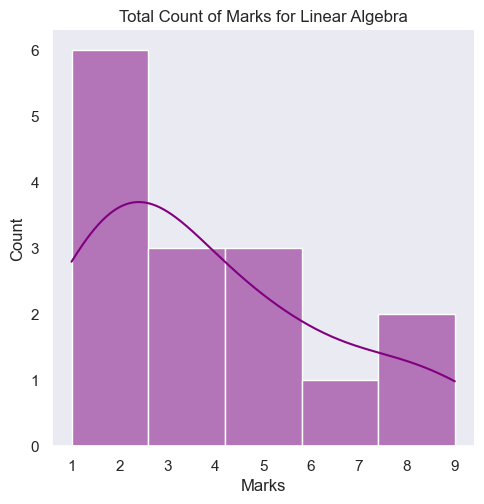

In [50]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Linear Algebra',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Linear Algebra')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks25.png',dpi=400,bbox_inches='tight')

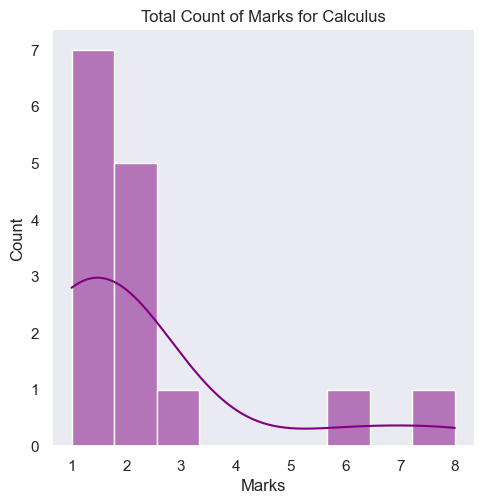

In [51]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Calculus',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Calculus')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks26.png',dpi=400,bbox_inches='tight')

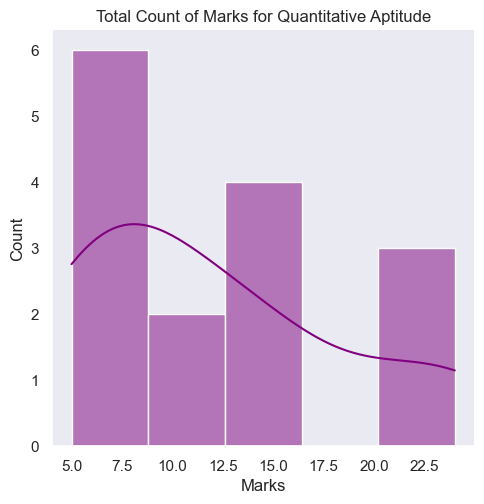

In [52]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Quantitative Aptitude',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Quantitative Aptitude')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks27.png',dpi=400,bbox_inches='tight')

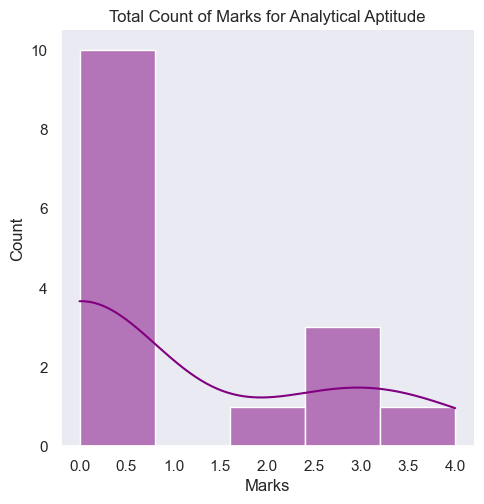

In [53]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Analytical Aptitude',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Analytical Aptitude')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks28.png',dpi=400,bbox_inches='tight')

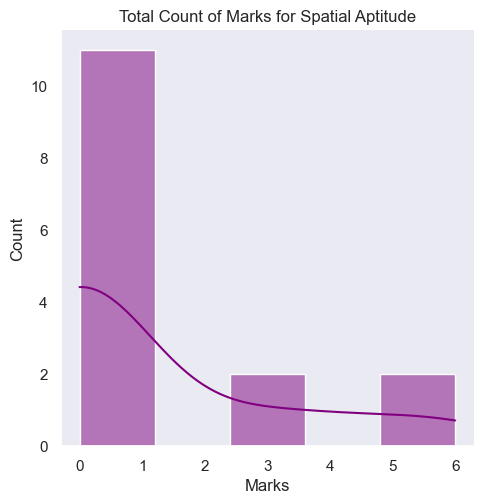

In [54]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Spatial Aptitude',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Spatial Aptitude')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks29.png',dpi=400,bbox_inches='tight')

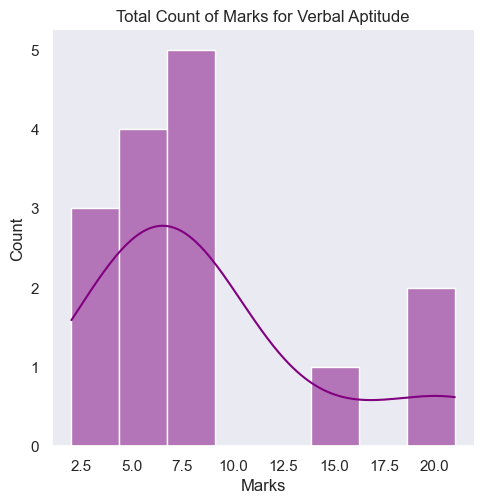

In [55]:
sns.set(style='dark',)
fig=sns.displot(data = all_years_total_marks, x = 'Verbal Aptitude',color='purple',legend=True,kde=True)
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Verbal Aptitude')
plt.show()
fig.figure.savefig('Total_Marks\\total_marks30.png',dpi=400,bbox_inches='tight')

## Box Plots

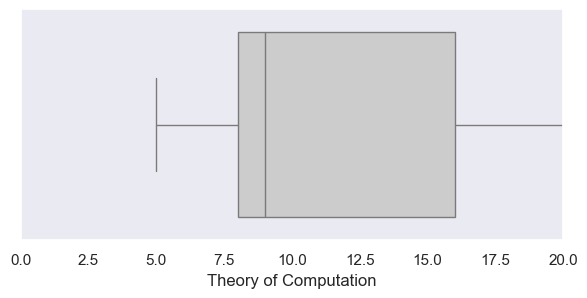

In [56]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Theory of Computation'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks31.png',dpi=400,bbox_inches='tight')

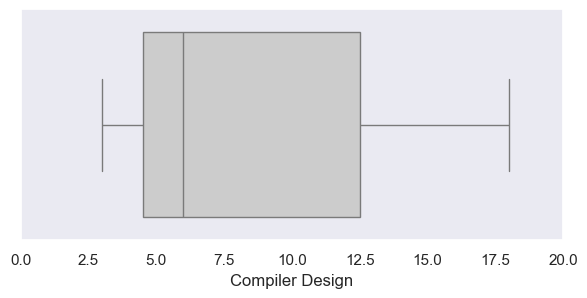

In [57]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Compiler Design'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks32.png',dpi=400,bbox_inches='tight')

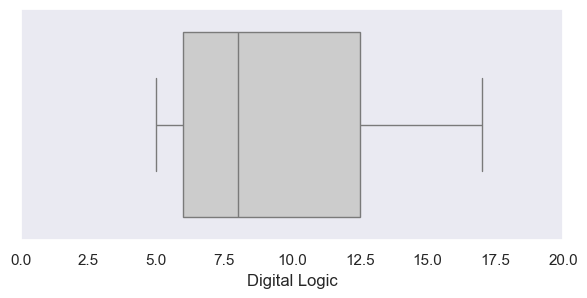

In [58]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Digital Logic'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks33.png',dpi=400,bbox_inches='tight')

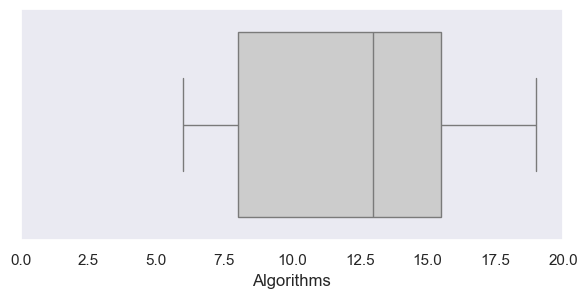

In [59]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Algorithms'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks34.png',dpi=400,bbox_inches='tight')

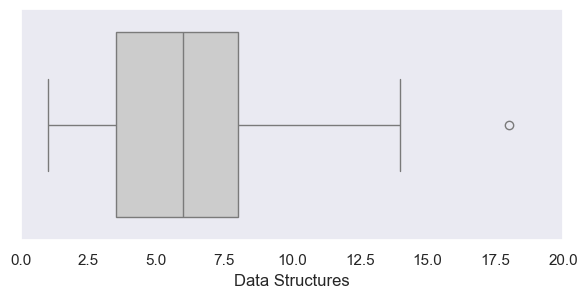

In [60]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Data Structures'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks35.png',dpi=400,bbox_inches='tight')

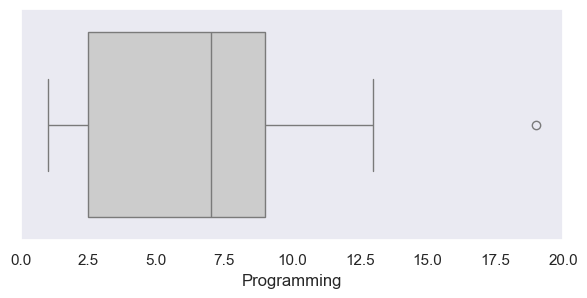

In [61]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Programming'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks36.png',dpi=400,bbox_inches='tight')

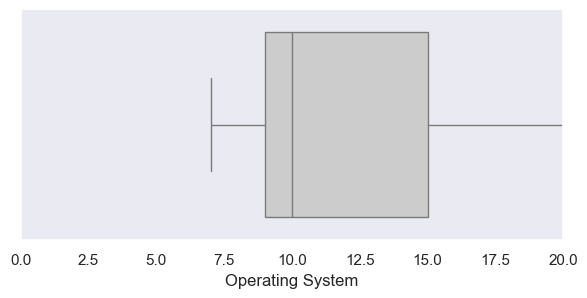

In [62]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Operating System'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks37.png',dpi=400,bbox_inches='tight')

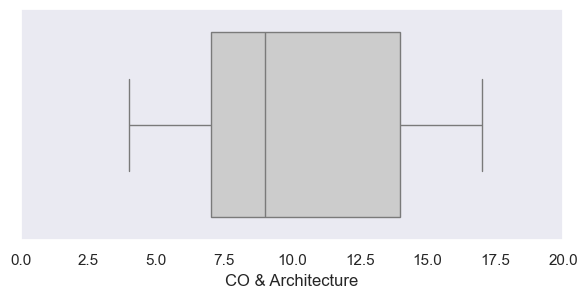

In [63]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['CO & Architecture'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks38.png',dpi=400,bbox_inches='tight')

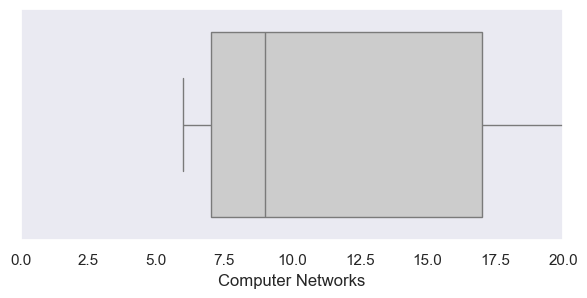

In [64]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Computer Networks'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks39.png',dpi=400,bbox_inches='tight')

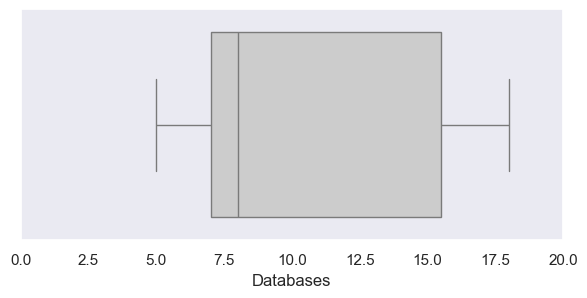

In [65]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Databases'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks40.png',dpi=400,bbox_inches='tight')

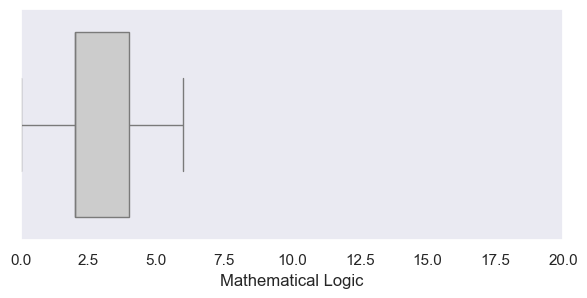

In [66]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Mathematical Logic'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks41.png',dpi=400,bbox_inches='tight')

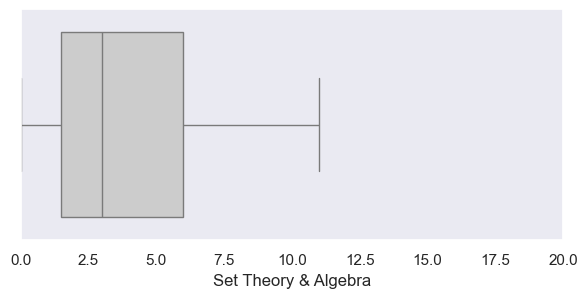

In [67]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Set Theory & Algebra'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks42.png',dpi=400,bbox_inches='tight')

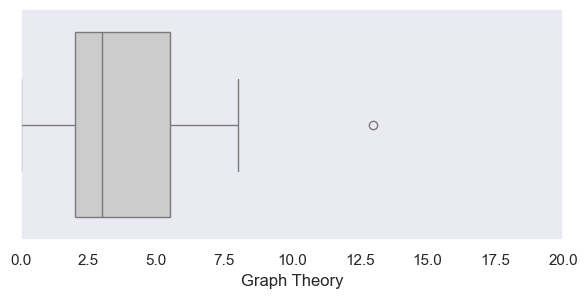

In [68]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Graph Theory'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks43.png',dpi=400,bbox_inches='tight')

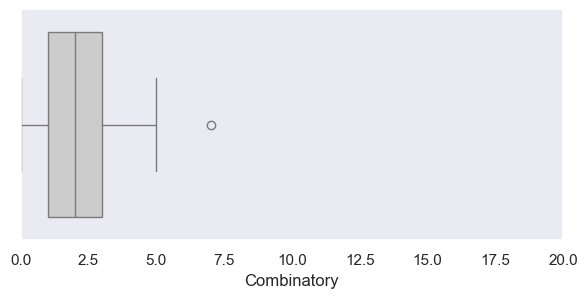

In [69]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Combinatory'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks44.png',dpi=400,bbox_inches='tight')

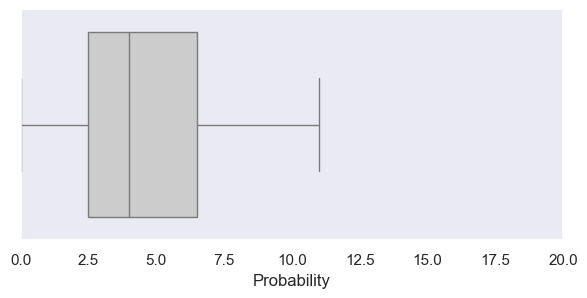

In [70]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Probability'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks45.png',dpi=400,bbox_inches='tight')

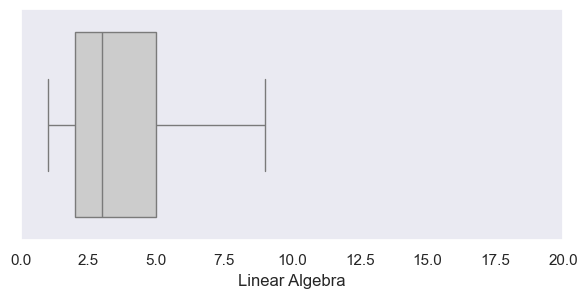

In [71]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Linear Algebra'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks46.png',dpi=400,bbox_inches='tight')

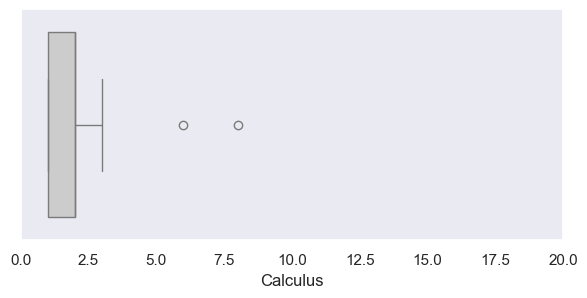

In [72]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Calculus'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks47.png',dpi=400,bbox_inches='tight')

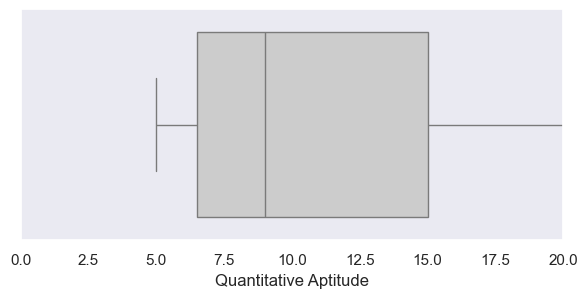

In [73]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Quantitative Aptitude'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks48.png',dpi=400,bbox_inches='tight')

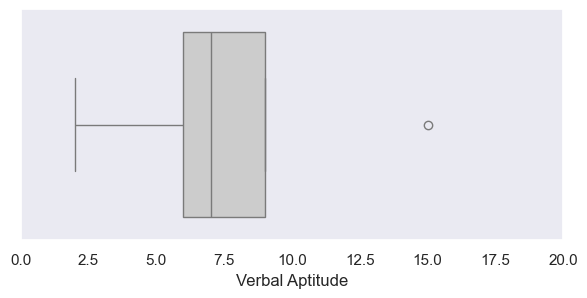

In [74]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Verbal Aptitude'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks49.png',dpi=400,bbox_inches='tight')

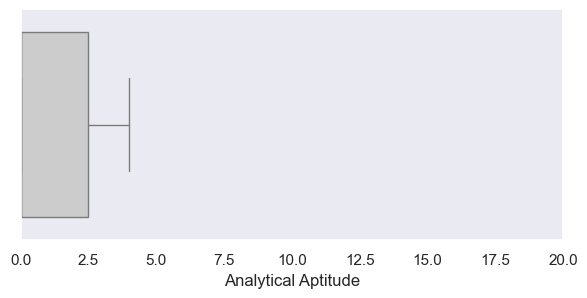

In [75]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Analytical Aptitude'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks50.png',dpi=400,bbox_inches='tight')

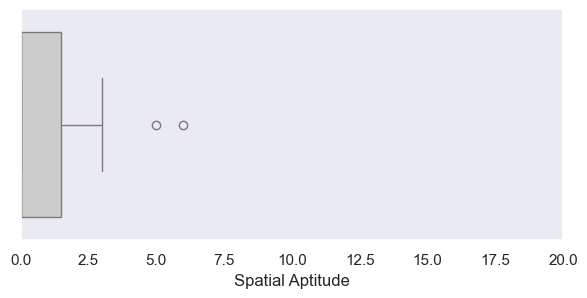

In [76]:
plt.figure(figsize=(7,3))
plt.xlim(0,20)
fig=sns.boxplot(x=all_years_total_marks['Spatial Aptitude'], color=".8",)
plt.show()
fig.figure.savefig('Total_Marks\\total_marks51.png',dpi=400,bbox_inches='tight')

In [77]:
## Histogram for Mixed Subjects

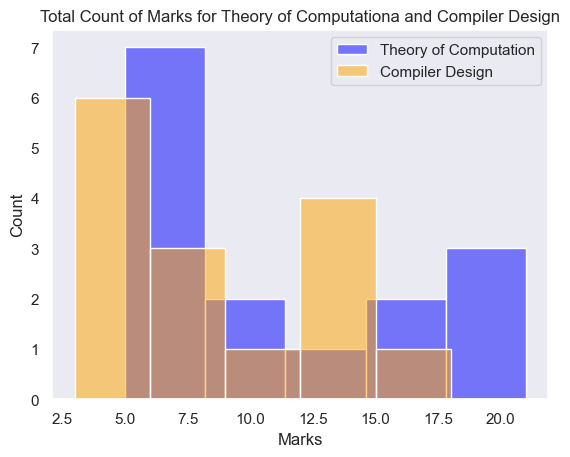

In [78]:
fig=sns.histplot(data=Theory_of_Computation,color='blue',alpha=0.5, label='Theory of Computation')
fig=sns.histplot(data=Compiler_Design,color='orange',alpha=0.5, label='Compiler Design')
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Theory of Computationa and Compiler Design')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks52.png',dpi=400,bbox_inches='tight')

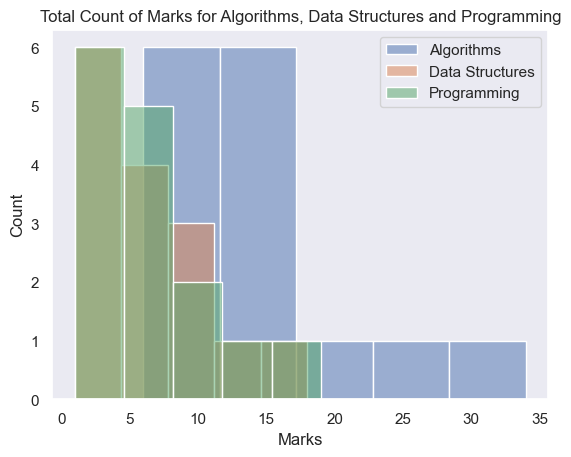

In [79]:
sns.histplot(data=Algorithms,alpha=0.5, label='Algorithms')
sns.histplot(data=Data_Structures,alpha=0.5, label='Data Structures')
fig=sns.histplot(data=Programming,alpha=0.5,label='Programming')

plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Algorithms, Data Structures and Programming')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks53.png',dpi=400,bbox_inches='tight')

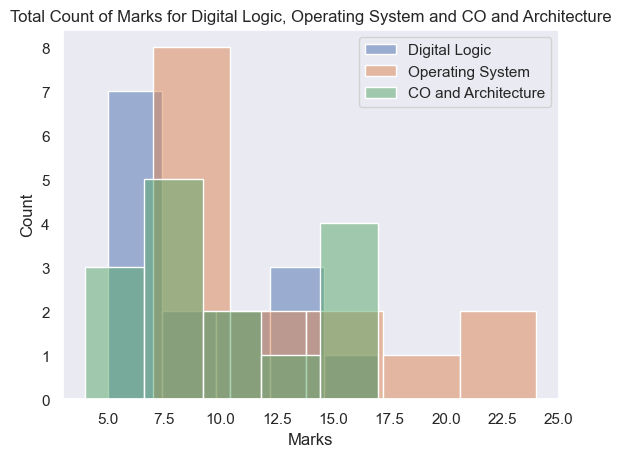

In [80]:
sns.histplot(data=Digital_Logic,alpha=0.5, label='Digital Logic')
sns.histplot(data=Operating_System,alpha=0.5, label='Operating System')
fig=sns.histplot(data=CO_and_Architecture,alpha=0.5,label='CO and Architecture')

plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Digital Logic, Operating System and CO and Architecture')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks54.png',dpi=400,bbox_inches='tight')

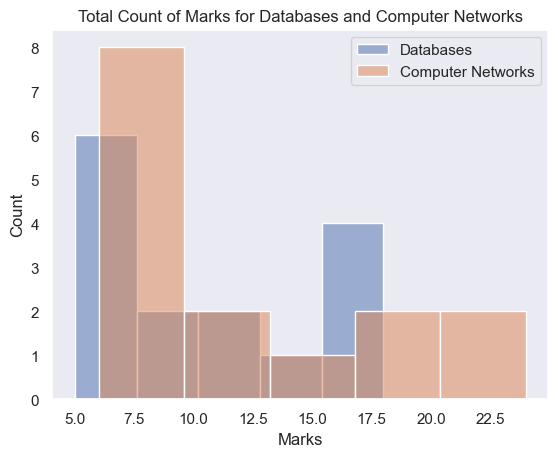

In [81]:
sns.histplot(data=Databases,alpha=0.5, label='Databases')
fig=sns.histplot(data=Computer_Networks,alpha=0.5, label='Computer Networks')

plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Databases and Computer Networks')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks55.png',dpi=400,bbox_inches='tight')

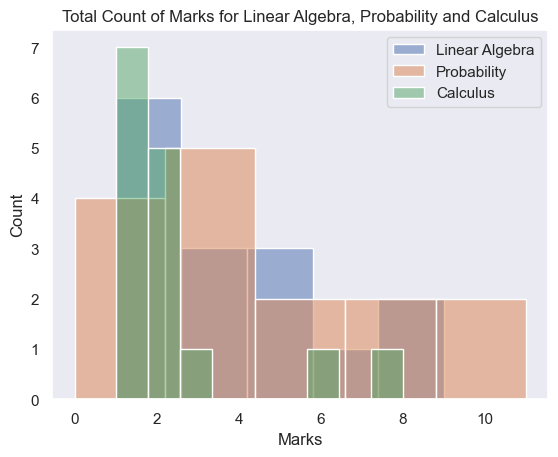

In [82]:
sns.histplot(data=Linear_Algebra,alpha=0.5, label='Linear Algebra')
sns.histplot(data=Probability,alpha=0.5, label='Probability')
fig=sns.histplot(data=Calculus,alpha=0.5, label='Calculus')

plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Linear Algebra, Probability and Calculus')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks56.png',dpi=400,bbox_inches='tight')

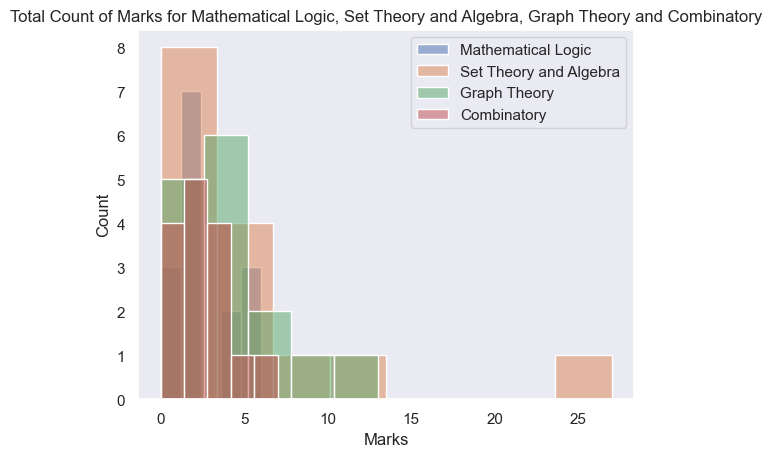

In [83]:
sns.histplot(data=Mathematical_Logic,alpha=0.5, label='Mathematical Logic')
sns.histplot(data=Set_Theory_and_Algebra,alpha=0.5, label='Set Theory and Algebra')
sns.histplot(data=Graph_Theory,alpha=0.5, label='Graph Theory')
fig=sns.histplot(data=Combinatory,alpha=0.5, label='Combinatory')

plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Mathematical Logic, Set Theory and Algebra, Graph Theory and Combinatory')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks57.png',dpi=400,bbox_inches='tight')

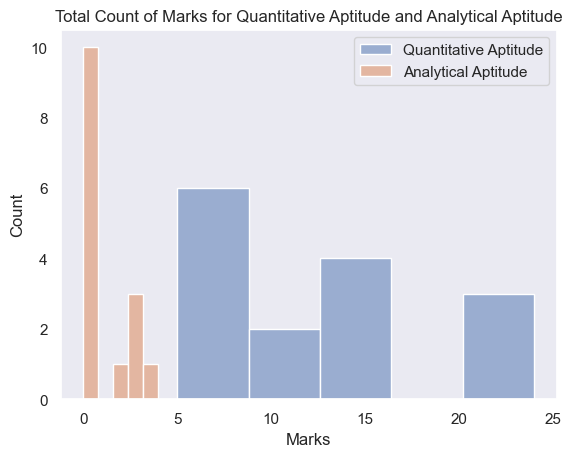

In [84]:
sns.histplot(data=Quantitative_Aptitude,alpha=0.5, label='Quantitative Aptitude')
fig=sns.histplot(data=Analytical_Aptitude,alpha=0.5, label='Analytical Aptitude')

plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Quantitative Aptitude and Analytical Aptitude')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks58.png',dpi=400,bbox_inches='tight')

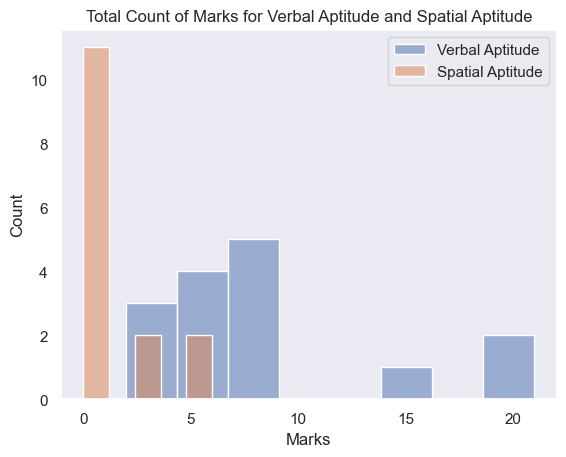

In [85]:
sns.histplot(data=Verbal_Aptitude,alpha=0.5, label='Verbal Aptitude')
fig=sns.histplot(data=Spatial_Aptitude,alpha=0.5, label='Spatial Aptitude')

plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Total Count of Marks for Verbal Aptitude and Spatial Aptitude')
plt.legend()
plt.show()
fig.figure.savefig('Total_Marks\\total_marks59.png',dpi=400,bbox_inches='tight')